In [1]:
using Optim
using Statistics

In [2]:
using Plots
ezcontour(x, y, f) = begin
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> log(f([x,y])), X, Y)
    plot(x, y, Z, st=:contour)
end

ezcontour (generic function with 1 method)

In [3]:
f = x -> (x[1].^2 + x[2] - 11).^2 + (x[1] + x[2].^2 - 7).^2
sol = optimize(f, [0.0;0.0], NelderMead())
xs = sol.minimizer

2-element Vector{Float64}:
 2.999997967010201
 2.000014239464575

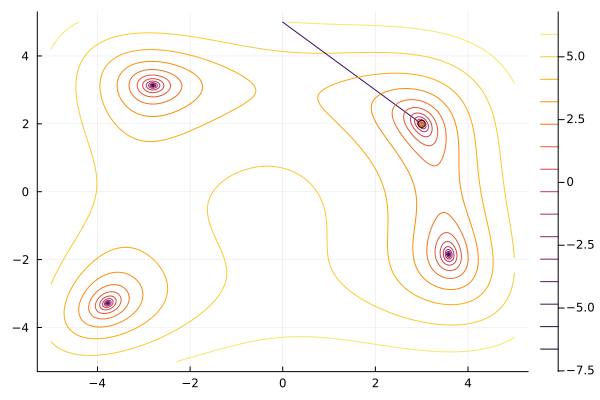

In [4]:
ezcontour(-5:0.02:5, -5:0.02:5, z -> f(z)[1])
scatter!([xs[1]],[xs[2]],label=false)

In [6]:
""" Take one step of the Nelder-Mead method to optimize a 
continuous function with no derivatives.

    `nelder_mead_step!(f,X) -> X,type`

This modifies X
"""
function nelder_mead_step!(f,X)
    # just do the simplest thing that could be dramatically improved
    npts = size(X,2) # number of points
    n = size(X,1)    # dim
    @assert(npts == n+1) # need a simplex
    fs = zeros(npts)
    for i in 1:npts # compute all function vals
        fs[i] = f(vec(X[:,i]))
    end
    
    p = sortperm(fs) # sort in increasing order
    
    Xmid = @view X[:,p[1:end-1]]
    xworst = @view X[:,p[end]]
    centroid = vec(mean(Xmid,dims=2))
    
    xbar = alpha -> centroid + alpha*(xworst - centroid)
    
    fm1 = f(xbar(-1)) # unit step away from centroid
    step = 0.0
    if fs[p[1]] <= fm1 && fm1 <= fs[p[end-1]]
        # accept
        xworst[:] = xbar(-1)
        step = -1.0
        return X,step
    elseif fm1 < fs[p[1]] # we found a much better point 
        # try and improve
        fm2 = f(xbar(-2))
        if fm2 < fm1
            # we made things better, accept!
            xworst[:] = xbar(-2)
            step = -2.0
            return X,step
        else
            xworst[:] = xbar(-1)
            step = -1.0
            return X,step
        end
    else
        # fm1 > second worst point
        if fs[p[end-1]] <= fm1 && fm1 <= fs[p[end]]
            fmhalf = f(xbar(-1/2))
            if fmhalf <= fm1
                xworst[:] = xbar(-1/2)
                step = -1/2
                return X,step
            end
        else
            fhalf = f(xbar(1/2))
            if fhalf < fs[p[end]] # we got slighlty better
                xworst[:] = xbar(1/2)
                step = 1/2
                return X,step
            end
        end
    end
       
    @assert(step == 0.0)
    # shrink towards best point
    xbest = @view X[:,p[1]]
    for i=1:npts
        if i != p[1]
            X[:,i] = 1/2*(X[:,i] + xbest)
        end
    end
    return X,step
end

nelder_mead_step!

In [7]:
X = 2.5*randn(2,3)
nelder_mead_step!(f,X)

([1.7823666273943854 -1.7015631815908827 0.9760784599965912; -4.004247983423581 -4.749737342487923 -1.4620998628279258], -0.5)

In [8]:
using Interact
using Printf

WebIO._IJuliaInit()

In [9]:
nstart = 10
X0s = collect(map( x -> 2.5*randn(2,3), 1:nstart )) # generate 10 sets of starts
@manipulate for start=1:nstart, nstep=0:20
        ezcontour(-5:0.02:5, -5:0.02:5, z -> f(z)[1])
    X = copy(X0s[start])
    for j=1:nstep
        nelder_mead_step!(f, X)
        plot!(Shape([ (X[1,i], X[2,i]) for i in 1:size(X,2) ]), 
            fillalpha=0.2, fillcolor="grey")
    end
    
    plot!(Shape([ (X[1,i], X[2,i]) for i in 1:size(X,2) ]))
    title!(@sprintf("start = %i, step = %i", start, nstep))
    plot!(legend=false)
end
    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["start"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(5), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/dgleich/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dgleich/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dgleich/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/dgleich/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/dgleich/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x000000010b2f6270, Task (runnable, started) @0x000000010b2f6270), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (12979687504, 4753992352, 429614998906)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",

In [ ]:
X0